# 1.1 Exercice théorique

$<w,b> + b = 0$

$w = \begin{pmatrix}1 & 2 & 3\end{pmatrix}^\intercal$ et $b = 4$

## 1.1.1 Lesquels des points suivants sont incorrectement classifiés ?

$x_1 = \begin{pmatrix}0 & 0 & 0\end{pmatrix}^\intercal$ et $y_1 = -1$. 

On a $<\begin{pmatrix}1 & 2 & 3\end{pmatrix}^\intercal, \begin{pmatrix}0 & 0 & 0\end{pmatrix}^\intercal> + 4 = 0\cdot 1 + 0\cdot 2+0\cdot 3 + 4= 4$ 

Pas correctement classifié car on veut $4\cdot-1>0$

----

$x_2 = \begin{pmatrix}-1 & -1 & -1\end{pmatrix}^\intercal$ et $y_2 = 1$.  => $-6 + 4 = -2$ 

Pas correctement classifié car on veut $-2\cdot 1>0$

----

$x_3 = \begin{pmatrix}-3.99 & -3 & 2\end{pmatrix}^\intercal$ et $y_2 = 1$.  => $-3.99 - 6 + 6 + 4 = 0.01$ 

Correctement classifié car $0.01\cdot 1>0$

## 1.1.2 Variables d'ajustements $\xi_i$

$\xi_1 = 5$

$\xi_2 = 3$

$\xi_3 = 0.99$

# 1.2 Données séparables linéairement

In [25]:
from sklearn.datasets import make_blobs
import numpy as np
import sklearn.svm
from matplotlib import pyplot as plt
from mglearn.plot_interactive_tree import plot_tree_partition
from mglearn.plot_2d_separator import plot_2d_separator
from mglearn.tools import discrete_scatter
from sklearn.metrics import classification_report

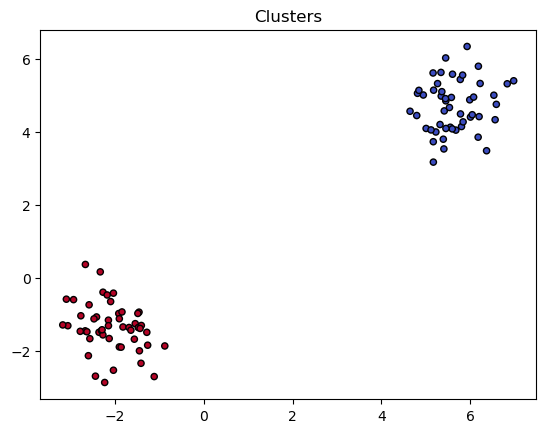

In [26]:
X, y = make_blobs(n_samples=100, centers=2, cluster_std=0.6, random_state=30032)
#plt.scatter(*Ax, marker='+')
#plt.scatter(*Bx, c= 'green', marker='o')

plt.scatter(X[:, 0], X[:, 1], c=y,cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title("Clusters")
plt.show()

Vecteurs de supports:
[[ 5.17214253  3.18029523]
 [-1.45777842 -0.93167404]
 [-0.87709567 -1.85862741]]


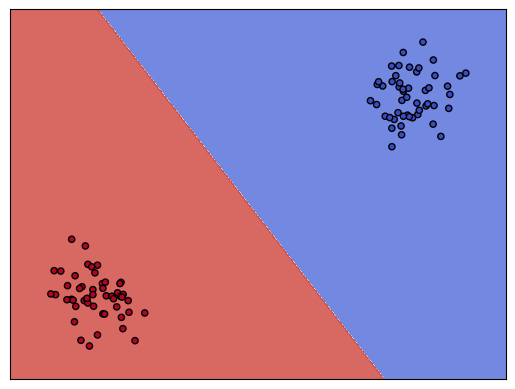

In [27]:
clf = sklearn.svm.SVC(kernel="linear")

clf.fit(X,y)

print("Vecteurs de supports:")
print(clf.support_vectors_)

# https://stackoverflow.com/a/51301399
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
fig, ax = plt.subplots()
# title for the plots
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
#ax.set_ylabel('y label here')
#ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

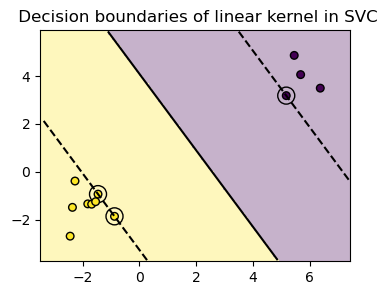

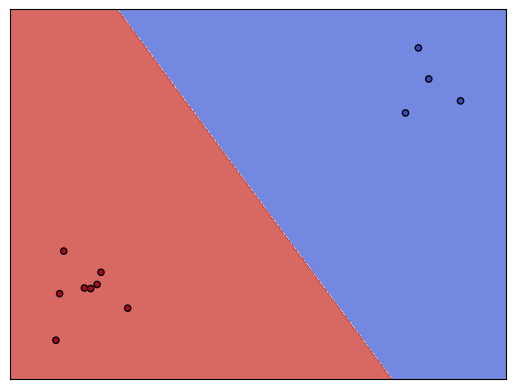

In [28]:
X2 = []
y2 = []
for i in range(len(X)):
    if X[i] in clf.support_vectors_:
        X2.append(X[i])
        y2.append(y[i])
    elif len(X2)<10:
        X2.append(X[i])
        y2.append(y[i])

X2=np.array(X2)
y2=np.array(y2)

from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay


def plot_training_data_with_decision_boundary(
    kernel, ax=None, long_title=True, support_vectors=True
):
    # Train the SVC
    clf = svm.SVC(kernel=kernel, gamma=2).fit(X2, y2)

    # Settings for plotting
    if ax is None:
        _, ax = plt.subplots(figsize=(4, 3))
    #x_min, x_max, y_min, y_max = -3, 3, -3, 3
    #ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    # Plot decision boundary and margins
    common_params = {"estimator": clf, "X": X2, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    if support_vectors:
        # Plot bigger circles around samples that serve as support vectors
        ax.scatter(
            clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=150,
            facecolors="none",
            edgecolors="k",
        )

    # Plot samples by color and add legend
    ax.scatter(X2[:, 0], X2[:, 1], c=y2, s=30, edgecolors="k")
    #ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    if long_title:
        ax.set_title(f" Decision boundaries of {kernel} kernel in SVC")
    else:
        ax.set_title(kernel)

    if ax is None:
        plt.show()

plot_training_data_with_decision_boundary("linear")

clf2 = sklearn.svm.SVC(kernel="linear")
clf2.fit(X2, y2)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
fig, ax = plt.subplots()
# title for the plots
# Set-up grid for plotting.
X0, X1 = X2[:, 0], X2[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf2, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y2, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
#ax.set_ylabel('y label here')
#ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

# 1.3 Données presque séparables linéairement

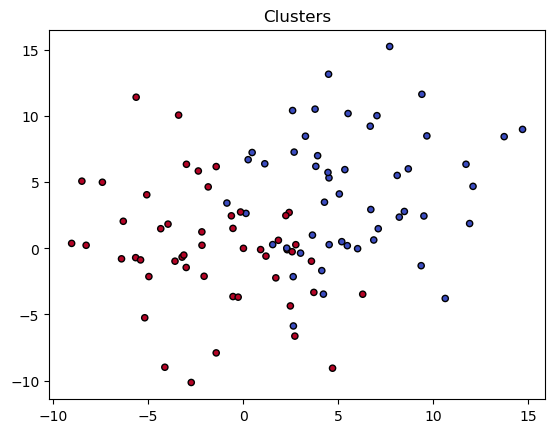

In [29]:
X, y = make_blobs(n_samples=100, centers=2, cluster_std=4, random_state=30032)


plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title("Clusters")
plt.show()

C=0.1
              precision    recall  f1-score   support

           0       0.91      0.82      0.86        50
           1       0.84      0.92      0.88        50

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100

C=0.01
              precision    recall  f1-score   support

           0       0.95      0.82      0.88        50
           1       0.84      0.96      0.90        50

    accuracy                           0.89       100
   macro avg       0.90      0.89      0.89       100
weighted avg       0.90      0.89      0.89       100

C=0.001
              precision    recall  f1-score   support

           0       0.91      0.84      0.88        50
           1       0.85      0.92      0.88        50

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100

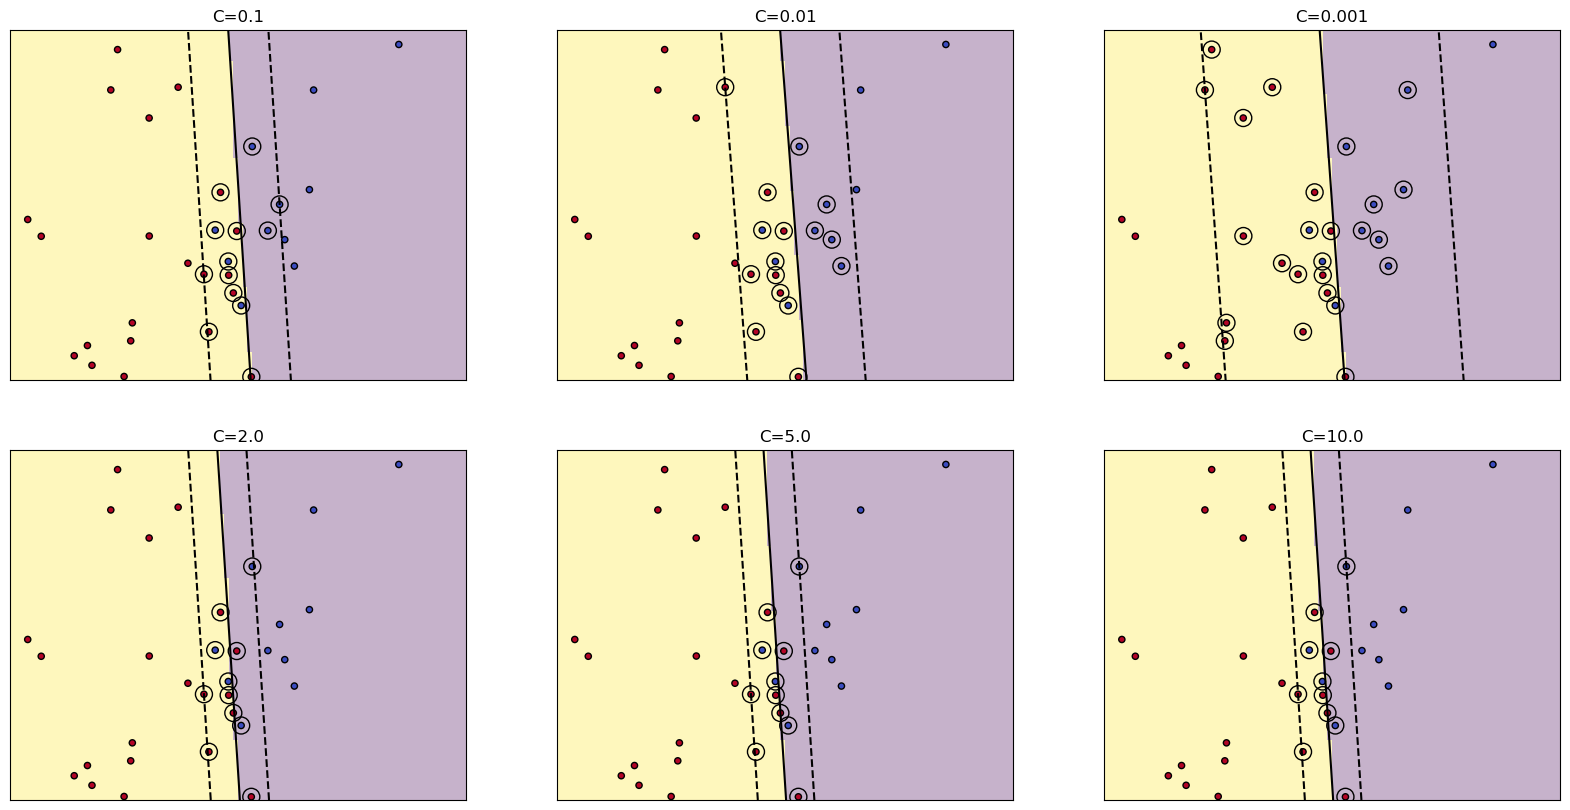

In [30]:
def plotC(C, ax):
    clf = sklearn.svm.SVC(kernel="linear", C=C)
    clf.fit(X,y)

    X0, X1 = X[:, 0], X[:, 1]

    # https://stackoverflow.com/a/51301399
    #def make_meshgrid(x, y, h=.02):
    x_min, x_max = X0.min() - 1, X0.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    ax.scatter(
            clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=150,
            facecolors="none",
            edgecolors="k",
    )
        #xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
       # return xx, yy

    # title for the plots
    # Set-up grid for plotting.
    ax.set_title(f"C={C}")

    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    #ax.set_ylabel('y label here')
    #ax.set_xlabel('x label here')
    ax.set_xticks(())
    ax.set_yticks(())

    report = classification_report(y_true=y, y_pred=clf.predict(X))
    print(f"C={C}")
    print(report)


fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes=axes.ravel()
C=[0.1, 0.01, 0.001, 2.0, 5.0, 10.0]
for i in range(6):
    plotC(C=C[i], ax=axes[i])

plt.show()

# 1.4 Données non séparables linéairement

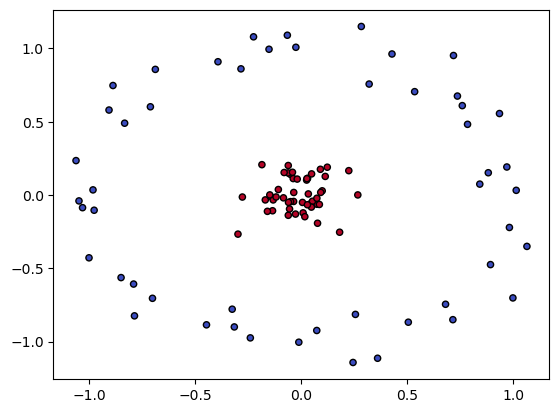

In [31]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1, random_state=2319)

plt.scatter(X[:, 0], X[:, 1], c=y,cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.show()

[]

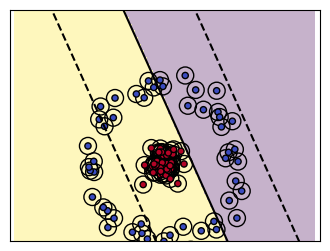

In [32]:
# Classifier linéaire
clf = sklearn.svm.SVC(kernel="linear")
clf.fit(X,y)

fig, ax = plt.subplots(figsize=(4, 3))

x_min, x_max = X.min() - 1, X.max() + 1
y_min, y_max = y.min() - 1, y.max() + 1
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

common_params = {"estimator": clf, "X": X, "ax": ax}

DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
DecisionBoundaryDisplay.from_estimator(
    **common_params,
    response_method="decision_function",
    plot_method="contour",
    levels=[-1, 0, 1],
    colors=["k", "k", "k"],
    linestyles=["--", "-", "--"],
)
# title for the plots

ax.scatter(
            clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=150,
            facecolors="none",
            edgecolors="k",
        )

ax.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
#ax.set_ylabel('y label here')
#ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())

plt.plot()

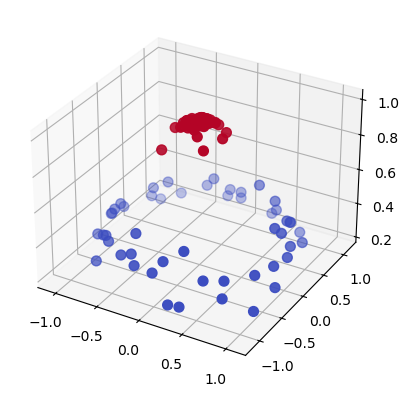

In [33]:
# (x,y) −→(x,y,exp(−(x^2+y2)))

def z(x,y):
    return np.exp(-x**2-y**2)

tmp = np.linspace(-2,2,51)
x_grid,y_grid = np.meshgrid(tmp,tmp)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.plot_surface(x_grid, y_grid, z(x_grid,y_grid), alpha=0.5)
ax.scatter3D(X[:, 0], X[:, 1], z(X[:,0],X[:,1]), c=y, s=50, cmap=plt.cm.coolwarm)
plt.show()


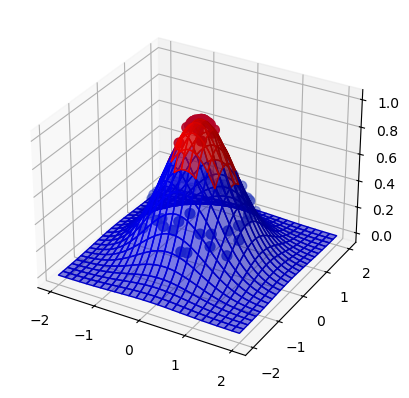

In [34]:
clf = sklearn.svm.SVC(kernel="linear")
X3d = np.zeros((X.shape[0], 3))
X3d[:,0]=X[:,0]
X3d[:,1]=X[:,1]
X3d[:,2]=z(X[:,0],X[:,1])

clf.fit(X3d,y)

# Map labels to colors: 1 -> one color, -1 -> another

tmp = np.linspace(-2,2,51)
x_grid,y_grid = np.meshgrid(tmp,tmp)

Xg = np.zeros((x_grid.size, 3))
Xg[:, 0] = x_grid.ravel()
Xg[:, 1] = y_grid.ravel()
Xg[:, 2] = z(x_grid, y_grid).ravel()

# Predict for all grid points
pred_grid = clf.predict(Xg)
# Reshape predictions to grid shape
pred_grid = pred_grid.reshape(x_grid.shape)

colors = np.where(pred_grid == 1, 'red', 'blue')


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_grid, y_grid, z(x_grid,y_grid),facecolors=colors,alpha=0.5 )
ax.scatter3D(X[:, 0], X[:, 1], z(X[:,0],X[:,1]), c=y, s=50, cmap=plt.cm.coolwarm)

#ax.view_init(elev=20, azim=270)  # Change these values as needed

plt.show()


[]

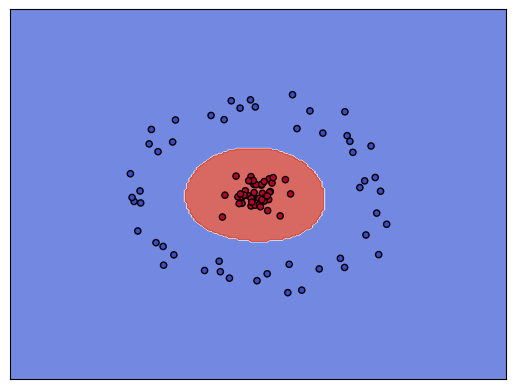

In [35]:
# Classifier linéaire
clf = sklearn.svm.SVC(kernel="rbf")
clf.fit(X,y)

# https://stackoverflow.com/a/51301399
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
# title for the plots
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
fig, ax = plt.subplots()

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
#ax.set_ylabel('y label here')
#ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())

plt.plot()

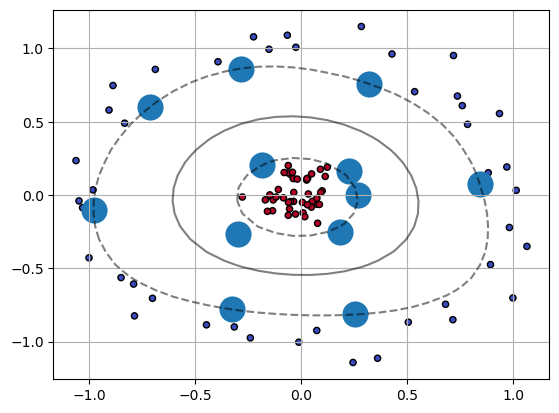

In [36]:
def plot_svc_decision_function(model, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        # create grid to evaluate model
        x = np.linspace(xlim[0], xlim[1], 30)
        y = np.linspace(ylim[0], ylim[1], 30)
        Y, X = np.meshgrid(y, x)
        xy = np.vstack([X.ravel(), Y.ravel()]).T
        P = model.decision_function(xy).reshape(X.shape)

        ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5,
                   linestyles=['--','-','--'])
# plot support vectors
    ax.scatter(model.support_vectors_[:, 0],
    model.support_vectors_[:, 1],
    s=300, linewidth=1.5)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)



plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.grid()
plot_svc_decision_function(clf)
plt.show()